In [1]:
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

Num GPUs Available:  1


In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [347]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout 

In [365]:
data="data/cleaned_all_data/"

In [366]:
df=pd.read_csv("data/annotated_data.csv")

In [367]:
df.info

<bound method DataFrame.info of                    data  annotation
0       E-S-01-F-01.png           1
1       E-S-01-F-02.png           1
2       E-S-01-F-03.png           1
3       E-S-01-F-04.png           1
4       E-S-01-F-05.png           1
...                 ...         ...
18300  B-S-100-G-20.tif           0
18301  B-S-100-G-21.tif           0
18302  B-S-100-G-22.tif           0
18303  B-S-100-G-23.tif           0
18304  B-S-100-G-24.tif           0

[18305 rows x 2 columns]>

In [368]:
df.head()

,data,annotation
0,E-S-01-F-01.png,1
1,E-S-01-F-02.png,1
2,E-S-01-F-03.png,1
3,E-S-01-F-04.png,1
4,E-S-01-F-05.png,1


In [369]:
images=df["data"].values

In [370]:
len(images)

18305

In [371]:
labels=df["annotation"].values

In [372]:
len(labels)

18305

In [373]:
import cv2
import numpy as np

In [374]:
# train_data=tf.data.Dataset.from_tensor_slices((images,labels))

In [375]:
# def get_images(img,label):
#     image=cv2.imread(data+img,cv2.IMREAD_GRAYSCALE)
#     #image=tf.image.decode_image(image,channels=1,dtype=tf.int64)
#     return image,label

In [376]:
X=[]

In [377]:
for image in images[:]:
    img=cv2.imread(data+image,cv2.IMREAD_UNCHANGED)
    img=cv2.bitwise_not(img)
    X.append(img)

In [280]:
X=np.array(X)

In [281]:
Y=[]
for label in labels:
    label_=[label]
    Y.append(label_)

In [282]:
X.shape

(18305, 128, 256)

In [283]:
Y=np.array(Y)

In [284]:
Y.shape

(18305, 1)

In [351]:
model=Sequential()

In [352]:
model.add(Input((256,512,1)))
model.add(Conv2D(32,activation = 'relu',kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,activation = 'relu',kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128,activation = 'relu',kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(256,activation = 'relu',kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(512,activation = 'relu',kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation = "softmax"))

In [353]:
# model.add(Input((128,256,1)))
# model.add(Conv2D(16,padding="same",kernel_size = (3,3)))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Flatten())
# # model.add(Dense(2, activation = "softmax"))

In [354]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [355]:
filename = 'fraud_sign_det.h5'

In [356]:
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [357]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 126, 254, 32)      320       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 63, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 61, 125, 64)       18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 30, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 60, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 14, 30, 128)    

In [358]:
history = model.fit(X,Y, epochs = 10, batch_size = 8, validation_split=0.3,verbose=1,callbacks=[checkpoint])

Epoch 1/10
1602/1602 [==============================] - ETA: 0s - loss: 0.7010 - accuracy: 0.6222
Epoch 00001: val_loss improved from inf to 0.70678, saving model to fraud_sign_det.h5
1602/1602 [==============================] - 25s 15ms/step - loss: 0.7010 - accuracy: 0.6222 - val_loss: 0.7068 - val_accuracy: 0.6012
Epoch 2/10
1602/1602 [==============================] - ETA: 0s - loss: 0.5551 - accuracy: 0.7050 ETA: 0s - loss: 0
Epoch 00002: val_loss improved from 0.70678 to 0.70049, saving model to fraud_sign_det.h5
1602/1602 [==============================] - 29s 18ms/step - loss: 0.5551 - accuracy: 0.7050 - val_loss: 0.7005 - val_accuracy: 0.6353
Epoch 3/10
1601/1602 [============================>.] - ETA: 0s - loss: 0.4941 - accuracy: 0.7460
Epoch 00003: val_loss improved from 0.70049 to 0.67931, saving model to fraud_sign_det.h5
1602/1602 [==============================] - 30s 19ms/step - loss: 0.4941 - accuracy: 0.7460 - val_loss: 0.6793 - val_accuracy: 0.6193
Epoch 4/10
1602/1

In [363]:
def plot_accuracy(history):
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['val_accuracy', 'Train_accuracy'], loc = 'best')
    plt.show()

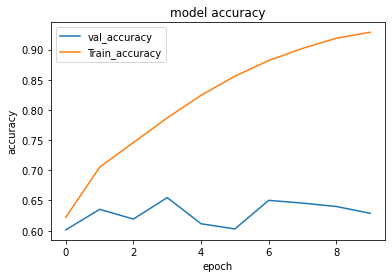

In [364]:
plot_accuracy(history)

In [361]:
def plot_loss(history):
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['val_loss', 'train_loss'], loc = 'best')
    plt.show()

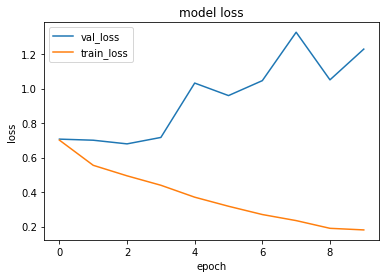

In [362]:
plot_loss(history)